In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

In [4]:
from google.colab import drive
import pandas as pd

drive.mount('/content/gdrive')

path = "/content/gdrive/MyDrive/Praktikum/Praktikum 11/Data"

df = pd.read_csv(path + '/goal_shotcreation.csv', header=1)

print(df.head())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
         Date           Time        Round  Day Venue Result  GF  GA  \
0  2021-08-15  20:00 (23:30)  Matchweek 1  Sun  Home      W   4   2   
1  2021-08-21  22:00 (01:30)  Matchweek 2  Sat  Away      D   1   1   
2  2021-08-29  17:00 (20:30)  Matchweek 3  Sun  Home      W   2   1   
3  2021-09-20  21:00 (00:30)  Matchweek 5  Mon  Home      D   1   1   
4  2021-09-23  22:00 (01:30)  Matchweek 6  Thu  Away      D   0   0   

        Opponent  SCA  ...  Fld  Def  GCA  PassLive.1  PassDead.1  Drib.1  \
0  Real Sociedad   23  ...    1    1    7           4           1       0   
1  Athletic Club   16  ...    1    0    2           2           0       0   
2         Getafe   13  ...    0    0    4           4           0       0   
3        Granada   32  ...    2    2    2           2           0       0   
4          Cádiz   12  ...    0    0    0           0    

In [5]:
features = ['SCA', 'GCA', 'PassLive', 'Drib', 'Sh']
X = df[features]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
dbscan = DBSCAN(eps=1.5, min_samples=3)

In [8]:
clusters = dbscan.fit_predict(X_scaled)

In [9]:
df['Cluster'] = clusters

In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

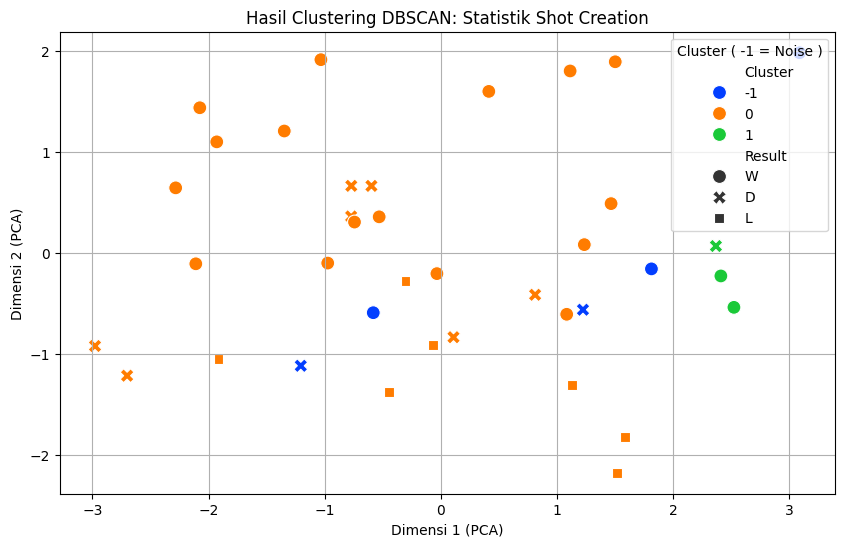

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=df['Cluster'],      # Warna berdasarkan Cluster DBSCAN
    palette='bright',       # Pilihan warna
    style=df['Result'],     # Bentuk titik berdasarkan Hasil Pertandingan (W/D/L)
    s=100                   # Ukuran titik
)

plt.title('Hasil Clustering DBSCAN: Statistik Shot Creation')
plt.xlabel('Dimensi 1 (PCA)')
plt.ylabel('Dimensi 2 (PCA)')
plt.legend(title='Cluster ( -1 = Noise )')
plt.grid(True)
plt.show()

In [12]:
print("\nStatistik Rata-rata per Cluster:")
# Kita lihat karakteristik tiap kelompok
print(df.groupby('Cluster')[features].mean())

print(f"\nJumlah Noise Points (-1): {list(clusters).count(-1)}")


Statistik Rata-rata per Cluster:
               SCA  GCA   PassLive      Drib        Sh
Cluster                                               
-1       28.200000  4.2  19.200000  3.000000  1.600000
 0       23.066667  3.2  18.233333  1.666667  0.566667
 1       35.666667  2.0  27.666667  1.000000  3.000000

Jumlah Noise Points (-1): 5
